# Info

CNN-based Neural Style Transfer

Using TensorFlow

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import time

In [ ]:
hub_module = hub.load('https://kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/1')

In [ ]:
# user input image
image_list = ['/content/drive/MyDrive/style_transfer/bg1.jpg',
              '/content/drive/MyDrive/style_transfer/bg2.jpg',
              '/content/drive/MyDrive/style_transfer/bg3.jpg']

# reference image 
style_list = ['/content/drive/MyDrive/style_transfer/pop_art.jpg']

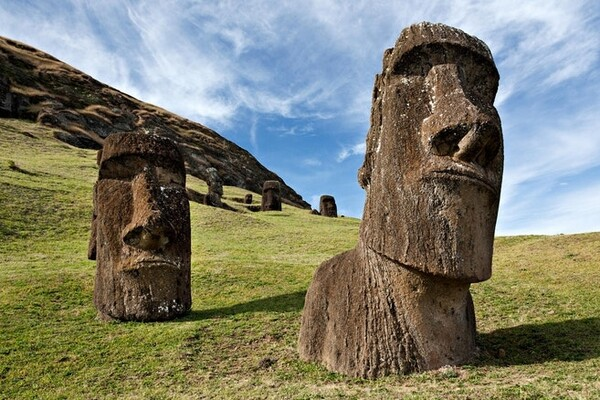

In [ ]:
Image.open(image_list[0])

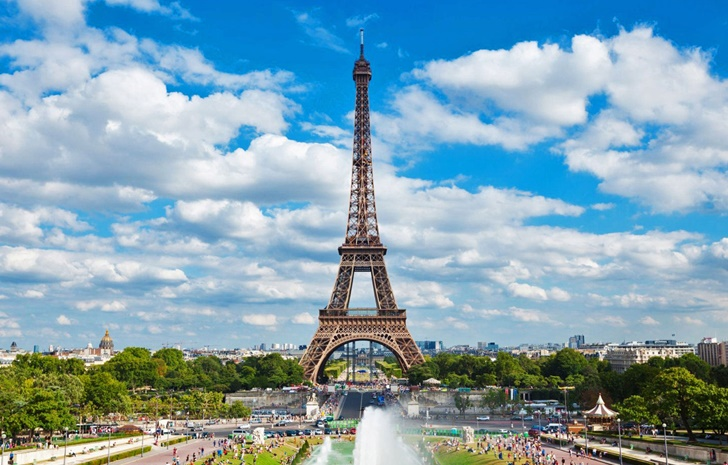

In [ ]:
Image.open(image_list[1])

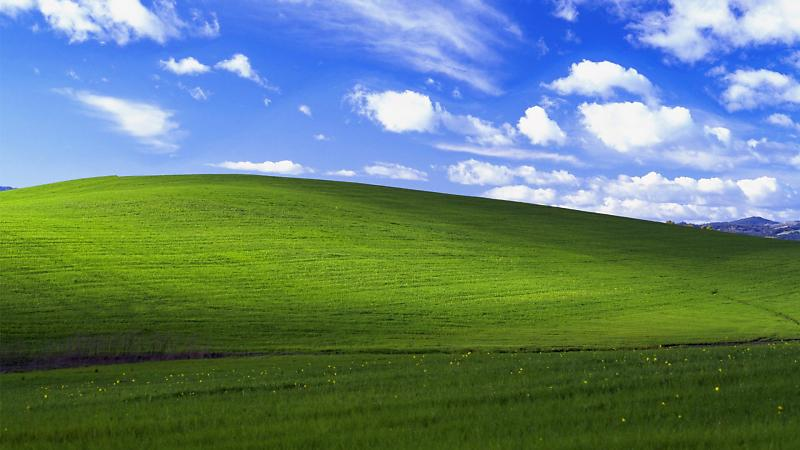

In [ ]:
Image.open(image_list[2])

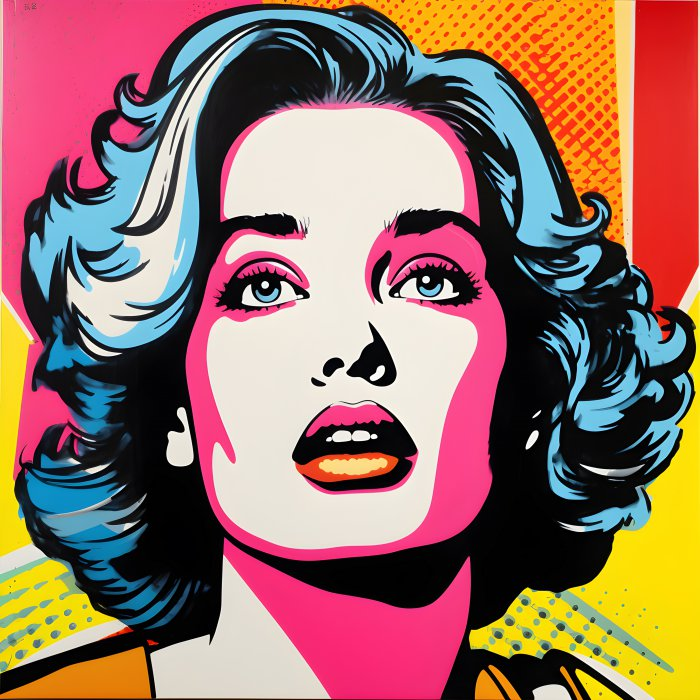

In [ ]:
# Ref image 
Image.open(style_list[0])

In [ ]:
def style_transfer(img_idx):
    start_time = time.time()

    content_image = plt.imread(image_list[img_idx])
    style_image = plt.imread(style_list[0])

    content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
    style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
    style_image = tf.image.resize(style_image, (256, 256))

    outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
    stylized_image = outputs[0]

    img = stylized_image.numpy().squeeze()
    img = (img * 255).astype(np.uint8)

    img = Image.fromarray(img)
    
    # 실제 구현 시 time 모듈 사용은 필요 없음 
    end_time = time.time()
    print('Time: %s'%(end_time - start_time))
    return img

In [ ]:
img_0 = style_transfer(0)

Time: 0.14596819877624512


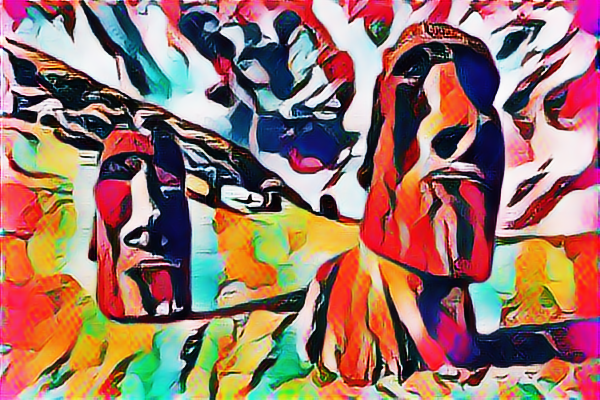

In [ ]:
img_0

In [ ]:
img_1 = style_transfer(1)

Time: 0.11237359046936035


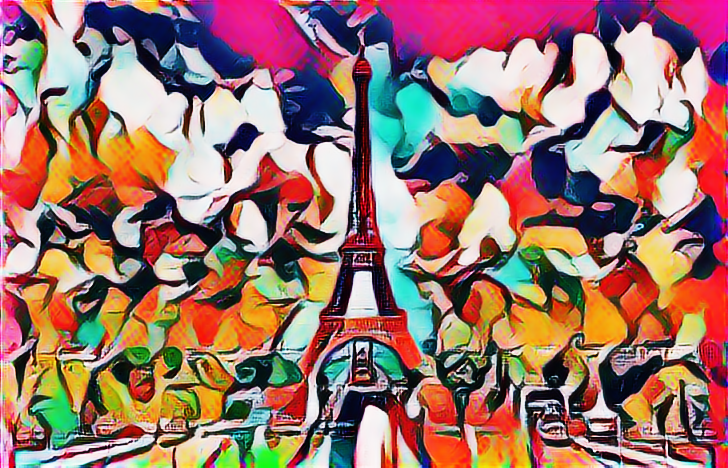

In [ ]:
img_1

In [ ]:
img_2 = style_transfer(2)

Time: 0.19198846817016602


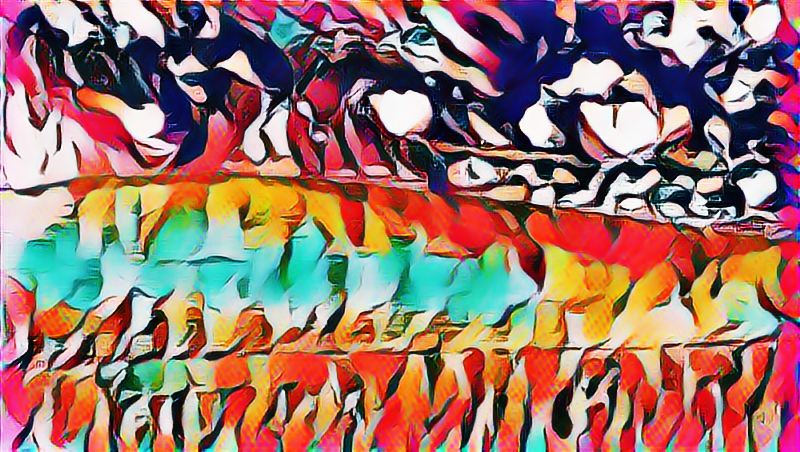

In [ ]:
img_2